

# Reporte de problemas fitosanitarios en plantaciones de agave
--------------------

## Equipo 36

| Nombre | Matrícula |
| ------ | --------- |
| André Martins Cordebello | A00572928 |
| Enrique Eduardo Solís Da Costa | A00572678 |
| Delbert Francisco Custodio Vargas | A01795613 |

## Avance 3: baseline

Este avance consiste en construir un modelo de referencia que permita evaluar la viabilidad del problema. Si el baseline tiene un rendimiento similar al azar, podría indicar que el problema es intrínsecamente difícil o que los datos no contienen suficiente información para predecir el objetivo. De lo contrario, el baseline podría como una solución mínima aceptable cuando se trabaja en escenarios donde incluso un modelo simple puede proporcionar valor.

Un baseline facilita también la gestión de expectativas, tanto dentro del equipo como con los stakeholders, pues proporciona una comprensión inicial de lo que se puede lograr con métodos simples antes de invertir tiempo y recursos en enfoques más complejos.

Se empieza con la carga del archivo con el cual se estará trabajando.

In [1]:
import pandas as pd
df = pd.read_excel('baseline.xlsx')
df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_11496\2894780301.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,tramp_id,sampling_date,lat,lon,municipality,square_area,plantation_age,capture_count,state,...,month_cos,critical_season,severity_encoded,distance_to_nearest_hotspot,hotspots_within_5km,text_feature_location,text_feature_risk,text_feature_capture,text_feature_plantation,text_feature_all_things
0,0,167_THUE13-16-104-0009T13,2014-01-01,20.01578,-102.57259,VILLAMAR,0.33,0,0.0,MICHOACAN,...,0.866025,0,0,62.301408,0,La trampa con identificacion 167_THUE13-16-104...,La trampa con identificacion 167_THUE13-16-104...,Durante la temporada normal el dia 1 del mes E...,En una plantacion de agave azul con area de 0....,En una plantacion de agave azul con area de 0....
1,1,167_THUE13-16-104-0009T15,2014-01-01,20.01428,-102.57326,VILLAMAR,0.34,0,0.0,MICHOACAN,...,0.866025,0,0,62.483803,0,La trampa con identificacion 167_THUE13-16-104...,La trampa con identificacion 167_THUE13-16-104...,Durante la temporada normal el dia 1 del mes E...,En una plantacion de agave azul con area de 0....,En una plantacion de agave azul con area de 0....
2,2,167_THUE13-16-104-0009T25,2014-01-01,20.01524,-102.57386,VILLAMAR,0.33,0,0.0,MICHOACAN,...,0.866025,0,0,62.407969,0,La trampa con identificacion 167_THUE13-16-104...,La trampa con identificacion 167_THUE13-16-104...,Durante la temporada normal el dia 1 del mes E...,En una plantacion de agave azul con area de 0....,En una plantacion de agave azul con area de 0....
3,3,167_THUE13-16-104-0009T10,2014-01-01,20.01723,-102.57218,VILLAMAR,0.33,0,0.0,MICHOACAN,...,0.866025,0,0,62.134520,0,La trampa con identificacion 167_THUE13-16-104...,La trampa con identificacion 167_THUE13-16-104...,Durante la temporada normal el dia 1 del mes E...,En una plantacion de agave azul con area de 0....,En una plantacion de agave azul con area de 0....
4,4,167_THUE13-16-104-0009T28,2014-01-01,20.01699,-102.57360,VILLAMAR,0.33,0,0.0,MICHOACAN,...,0.866025,0,0,62.215955,0,La trampa con identificacion 167_THUE13-16-104...,La trampa con identificacion 167_THUE13-16-104...,Durante la temporada normal el dia 1 del mes E...,En una plantacion de agave azul con area de 0....,En una plantacion de agave azul con area de 0....


Para lograr realizar un estudio de manera rápida y concisa, se estará trabajando únicamente con los datos obtenidos en los años 2023 a 2025 para reducir tiempos de entrenamiento y poder probar con más modelos en menos tiempo. Además, se eliminan columnas de texto que se utilizarán para entrenar el LLM del chatbot que se desarrollará, pero que no son de importancia para este estudio.

In [2]:
# ===============================
# Filtrar dataset (2023-2025) y eliminar columnas no necesarias
# ===============================

# Filtrar solo los años 2023, 2024 y 2025
df = df[df['year'].between(2023, 2025)]

# Verificar los valores únicos en la columna 'year'
print("Años disponibles en el dataset:", df['year'].unique())

# Eliminar columnas de texto irrelevantes
cols_to_drop = [
    'text_feature_location',
    'text_feature_risk',
    'text_feature_capture',
    'text_feature_plantation',
    'text_feature_all_things'
]

# Verificar si existen antes de eliminarlas
cols_present = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=cols_present)

print(f"Columnas eliminadas: {cols_present}")
print("Dimensiones finales del dataset:", df.shape)

# (Opcional) Guardar el dataset filtrado en un nuevo archivo
df.to_excel("baseline_filt_23_25.xlsx", index=False)
print("Archivo guardado como baseline_filt_23_25.xlsx")


Años disponibles en el dataset: [2023 2024 2025]
Columnas eliminadas: ['text_feature_location', 'text_feature_risk', 'text_feature_capture', 'text_feature_plantation', 'text_feature_all_things']
Dimensiones finales del dataset: (171683, 26)
Archivo guardado como baseline_filt_23_25.xlsx


Se vuelve a hacer un análisis de las variables categoricas para determinar si son relevantes para el estudio y si necesitan algún tipo de encoder.

In [3]:
# ===============================
# Análisis inicial del dataset filtrado (2023-2025)
# ===============================

import pandas as pd

# Cargar el archivo filtrado
df = pd.read_excel("baseline_filt_23_25.xlsx")

# Mostrar información general
print("Dimensiones del dataset:", df.shape)
print("\nColumnas del dataset:")
print(df.columns.tolist())

# Tipos de datos y conteo de valores nulos
print("\nResumen de tipos de datos y valores nulos:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar si hay variables categóricas
print("\nVariables categóricas detectadas:")
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols if len(cat_cols) > 0 else "No se detectaron variables categóricas")

# Mostrar ejemplo de los primeros registros
print("\nPrimeras filas del dataset:")
display(df.head())

Dimensiones del dataset: (171683, 26)

Columnas del dataset:
['Unnamed: 0', 'tramp_id', 'sampling_date', 'lat', 'lon', 'municipality', 'square_area', 'plantation_age', 'capture_count', 'state', 'square_area_imputed', 'month', 'year', 'year_month', 'day_of_year_sin', 'day_of_year_cos', 'day_of_week_sin', 'day_of_week_cos', 'week_of_year_sin', 'week_of_year_cos', 'month_sin', 'month_cos', 'critical_season', 'severity_encoded', 'distance_to_nearest_hotspot', 'hotspots_within_5km']

Resumen de tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171683 entries, 0 to 171682
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   171683 non-null  int64         
 1   tramp_id                     171683 non-null  object        
 2   sampling_date                171683 non-null  datetime64[ns]
 3   lat                        

,Unnamed: 0,tramp_id,sampling_date,lat,lon,municipality,square_area,plantation_age,capture_count,state,...,day_of_week_sin,day_of_week_cos,week_of_year_sin,week_of_year_cos,month_sin,month_cos,critical_season,severity_encoded,distance_to_nearest_hotspot,hotspots_within_5km
0,656173,162_THUE13-16-074-0027T01,2023-01-01,20.096520,-102.814320,COJUMATLAN DE REGULES,1.0,0,0.0,MICHOACAN,...,-0.781831,0.62349,-2.449294e-16,1.0,0.5,0.866025,0,0,9999.0,0
1,656174,162_THUE13-16-074-0007T01,2023-01-01,20.147118,-102.896716,COJUMATLAN DE REGULES,1.0,0,0.0,MICHOACAN,...,-0.781831,0.62349,-2.449294e-16,1.0,0.5,0.866025,0,0,9999.0,0
2,656175,162_THUE13-16-074-0013T01,2023-01-01,20.142147,-102.882885,COJUMATLAN DE REGULES,2.0,0,0.0,MICHOACAN,...,-0.781831,0.62349,-2.449294e-16,1.0,0.5,0.866025,0,0,9999.0,0
3,656176,162_THUE13-16-074-0012T01,2023-01-01,20.144013,-102.882413,COJUMATLAN DE REGULES,2.0,0,0.0,MICHOACAN,...,-0.781831,0.62349,-2.449294e-16,1.0,0.5,0.866025,0,0,9999.0,0
4,656177,162_THUE13-16-074-0024T01,2023-01-01,20.146415,-102.881007,COJUMATLAN DE REGULES,2.0,0,0.0,MICHOACAN,...,-0.781831,0.62349,-2.449294e-16,1.0,0.5,0.866025,0,0,9999.0,0


Se optó por eliminar la columna 'tramp_ID', ya que esta no agrega datos relevantes, así como severity_encoded que es redundante con capture_count, así como codificar las columnas 'municipality' y 'state' y separar la columna 'year_month' para poder obtener únicamente el mes (ya existe una columna con el año del dato).

In [4]:
# ===============================
# Preparación de variables categóricas
# ===============================

# Eliminar ID de trampa (no es informativo para el efecto de este modelo)
if 'tramp_id' in df.columns:
    df = df.drop(columns=['tramp_id'])

#Eliminar severity_encoded (parece redundante con capture_count)
if 'severity_encoded' in df.columns:
    df = df.drop(columns=['severity_encoded'])

# Convertir columna 'year_month' a variables numéricas separadas y eliminar year (ya existente)
if 'year_month' and 'sampling_date' in df.columns:
    df['day'] = df['sampling_date'].dt.day
    df['month'] = df['sampling_date'].dt.month
    df = df.drop(columns=['year_month','sampling_date'])

# Codificar variables categóricas relevantes ('municipality', 'state')
df = pd.get_dummies(df, columns=['municipality', 'state'], drop_first=True)

# Verificar resultado
print("Columnas finales después de la codificación:")
print(df.columns.tolist())

Columnas finales después de la codificación:
['Unnamed: 0', 'lat', 'lon', 'square_area', 'plantation_age', 'capture_count', 'square_area_imputed', 'month', 'year', 'day_of_year_sin', 'day_of_year_cos', 'day_of_week_sin', 'day_of_week_cos', 'week_of_year_sin', 'week_of_year_cos', 'month_sin', 'month_cos', 'critical_season', 'distance_to_nearest_hotspot', 'hotspots_within_5km', 'day', 'municipality_ACATIC', 'municipality_ACATLAN DE JUAREZ', 'municipality_AHUACATLAN', 'municipality_AHUALULCO DE MERCADO', 'municipality_AMACUECA', 'municipality_AMATITAN', 'municipality_AMATLAN DE CANAS', 'municipality_AMECA', 'municipality_ARANDAS', 'municipality_ATENGO', 'municipality_ATENGUILLO', 'municipality_ATOTONILCO EL ALTO', 'municipality_ATOYAC', 'municipality_AUTLAN DE NAVARRO', 'municipality_AYOTLAN', 'municipality_AYUTLA', 'municipality_BRISENAS', 'municipality_CANADAS DE OBREGON', 'municipality_CASIMIRO CASTILLO', 'municipality_CHAPALA', 'municipality_CHIQUILISTLAN', 'municipality_CHURINTZIO', 

Se hace la separación de la base de datos en variables dependientes e independientes para que se pueda empezar a crear modelos de predicción.

In [5]:
# Definir variables predictoras y objetivo
X = df.drop(columns=['capture_count'])
y = df['capture_count']

print("\nX shape:", X.shape)
print("y shape:", y.shape)



X shape: (171683, 167)
y shape: (171683,)


Ya que hizo la separación de las variables X y Y, se procede a crear un primer modelo de predicción utilizando Random Forest Regressor. Se optó por utilizar este método por que trabaja bien con datos no lineales, tolera outliers y nos permitirá obtener la importancia de las variables. Se realiza el estudio utilizando los valores default de RandomForestRegressor.

In [6]:
# ===============================
# Modelo Baseline - Random Forest
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar modelo baseline
rf = RandomForestRegressor(
    n_estimators=100,       # número de árboles
    max_depth=None,         # sin límite de profundidad
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Evaluación del modelo baseline con Random Forest Regressor:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")


Evaluación del modelo baseline con Random Forest Regressor:
MAE  = 2.8432
RMSE = 5.3918
R²   = 0.4908


🔹 XGBoost (reg:squarederror)
MAE  : 3.136
RMSE : 5.580
R²   : 0.455
Best iteration (early stop): 498

🔹 XGBoost (count:poisson)
MAE  : 3.134
RMSE : 5.636
R²   : 0.444
Best n_estimators (early stop): 799

Top 15 features:
hotspots_within_5km                         0.075826
state_NAYARIT                               0.037307
municipality_EL GRULLO                      0.024916
distance_to_nearest_hotspot                 0.023550
municipality_IXTLAHUACAN DEL RIO            0.021845
state_JALISCO                               0.020987
municipality_VILLAMAR                       0.020902
year                                        0.019723
municipality_JUCHITLAN                      0.016684
municipality_TUXCACUESCO                    0.016171
municipality_YAHUALICA DE GONZALEZ GALLO    0.015818
municipality_ROMITA                         0.015632
municipality_MARAVATIO                      0.015345
municipality_AUTLAN DE NAVARRO              0.014855
municipality_CANADAS DE OBREGON      

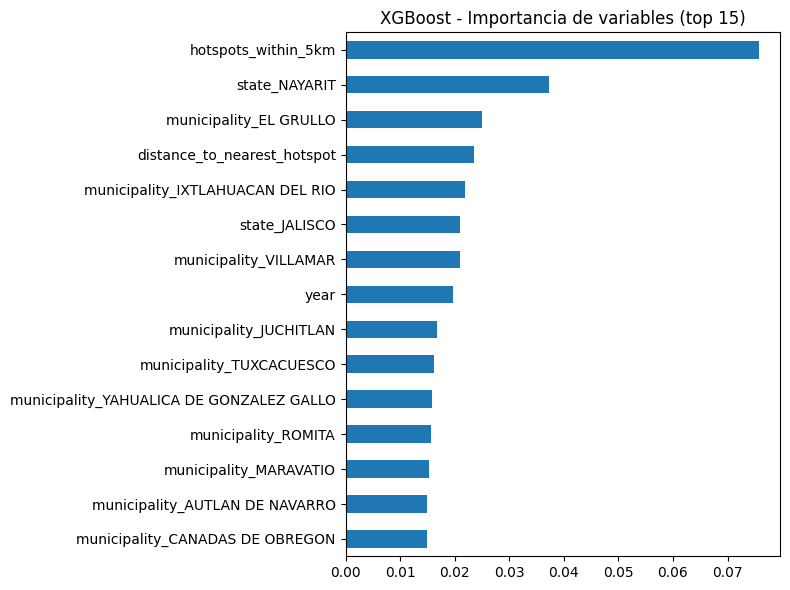

In [8]:
# =========================================
# Baseline con XGBoost
# - Modelo 1: reg:squarederror (MSE)
# - Modelo 2: count:poisson (para conteos >= 0)
# =========================================

from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# --- split para nuevo estudio
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def eval_reg(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred)
    return mae, rmse, r2

# ============== Modelo 1: cuadrático estándar ==============
xgb_mse = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

xgb_mse.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    early_stopping_rounds=50,
    verbose=False
)

pred_mse = xgb_mse.predict(X_valid)
mae1, rmse1, r21 = eval_reg(y_valid, pred_mse)

print("🔹 XGBoost (reg:squarederror)")
print(f"MAE  : {mae1:.3f}")
print(f"RMSE : {rmse1:.3f}")
print(f"R²   : {r21:.3f}")
print(f"Best iteration (early stop): {xgb_mse.best_iteration}")

# ============== Modelo 2: Poisson (siempre que y >= 0) ==============
if (y_train.min() >= 0) and (y_valid.min() >= 0):
    xgb_pois = XGBRegressor(
        objective='count:poisson',      # mejor para conteos
        eval_metric='poisson-nloglik',  # métrica de validación
        n_estimators=800,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    )

    xgb_pois.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=50,
        verbose=False
    )

    pred_pois = xgb_pois.predict(X_valid)
    mae2, rmse2, r22 = eval_reg(y_valid, pred_pois)

    print("\n🔹 XGBoost (count:poisson)")
    print(f"MAE  : {mae2:.3f}")
    print(f"RMSE : {rmse2:.3f}")
    print(f"R²   : {r22:.3f}")
    print(f"Best n_estimators (early stop): {xgb_pois.best_iteration}")
else:
    print("\n  Omitido modelo Poisson porque existen valores negativos en y.")

# ============== Importancias de variables (top 15) ==============
model_to_plot = xgb_pois if 'xgb_pois' in locals() else xgb_mse
importances = pd.Series(model_to_plot.feature_importances_, index=X.columns)
top15 = importances.sort_values(ascending=False).head(15)
print("\nTop 15 features:")
print(top15)

plt.figure(figsize=(8,6))
top15.sort_values().plot(kind='barh')
plt.title("XGBoost - Importancia de variables (top 15)")
plt.tight_layout()
plt.show()


Al realizar los estudios con XGBoost y con Random Forest Regressor, encontramos resultados ...............

In [9]:
# ==============================================
# Bayesian Optimization (Optuna) + Random Forest
# Optuna "Fast Mode" para RandomForestRegressor
# - Muestra opcional de filas
# - Hold-out en objetivo (sin CV)
# - Pruner para cortar trials malos
# - Espacio de búsqueda estrecho
# ==============================================
import optuna


# ---------- Toggles ----------
ROWS_SAMPLE   = 60000      # None para usar todo; pon 60_000 ~ 120_000 según tu máquina
TEST_SIZE_OBJ = 0.2        # hold-out dentro del objetivo
TEST_SIZE_FIN = 0.2        # hold-out final para reporte
N_TRIALS      = 20         # n interacciones
TIMEOUT       = None       # en segundos; p.ej. 900 para 15 min
RANDOM_STATE  = 42

# ---------- Copia y casting a float32 (más rápido/memoria) ----------
X_bo = X.copy()
for c in X_bo.columns:
    if np.issubdtype(X_bo[c].dtype, np.floating):
        X_bo[c] = X_bo[c].astype(np.float32)

y_bo = y.astype(np.float32)

# ---------- Muestreo opcional ----------
if ROWS_SAMPLE is not None and ROWS_SAMPLE < len(X_bo):
    X_bo, _, y_bo, _ = train_test_split(
        X_bo, y_bo, train_size=ROWS_SAMPLE, random_state=RANDOM_STATE
    )

# ---------- Split fijo para el objetivo (repetible y rápido) ----------
Xtr_obj, Xva_obj, ytr_obj, yva_obj = train_test_split(
    X_bo, y_bo, test_size=TEST_SIZE_OBJ, random_state=RANDOM_STATE
)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 250, 320),  # tope moderado
        "max_depth": trial.suggest_categorical("max_depth", [None, 8, 12, 24]),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 12),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 8),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.7, 1.0]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "n_jobs": -1,
        "random_state": RANDOM_STATE,
    }

    # Entrena en hold-out (más rápido que CV)
    model = RandomForestRegressor(**params)
    model.fit(Xtr_obj, ytr_obj)

    pred = model.predict(Xva_obj)
    rmse = mean_squared_error(yva_obj, pred, squared=False)

    # --- Pruning: si va mal, corta temprano comparando con mediana histórica
    trial.report(rmse, step=0)
    if trial.should_prune():
        raise optuna.TrialPruned()

    return rmse

# ---------- Pruner + estudio ----------
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
study = optuna.create_study(direction="minimize", pruner=pruner)
study.optimize(objective, n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True)

print("\n🏆 Mejores hiperparámetros (fast mode):")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")
print(f"Mejor RMSE (hold-out objetivo): {study.best_value:.4f}")

# ---------- Re-entrenar modelo final con TODO el dataset ----------
best_params = study.best_params.copy()
best_params.update({"n_jobs": -1, "random_state": RANDOM_STATE})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE_FIN, random_state=RANDOM_STATE
)

rf_best = RandomForestRegressor(**best_params)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print("\n📊 Desempeño final (hold-out):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-12 18:39:03,554] A new study created in memory with name: no-name-15f062da-a423-4ed5-a134-bae1eb9614f6
Best trial: 0. Best value: 5.81893:   5%|▌         | 1/20 [00:07<02:25,  7.64s/it]

[I 2025-10-12 18:39:11,193] Trial 0 finished with value: 5.8189293847269825 and parameters: {'n_estimators': 290, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 5.8189293847269825.


Best trial: 0. Best value: 5.81893:  10%|█         | 2/20 [00:23<03:45, 12.50s/it]

[I 2025-10-12 18:39:27,106] Trial 1 finished with value: 5.953514730165431 and parameters: {'n_estimators': 270, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7, 'bootstrap': True}. Best is trial 0 with value: 5.8189293847269825.


Best trial: 0. Best value: 5.81893:  15%|█▌        | 3/20 [01:05<07:23, 26.09s/it]

[I 2025-10-12 18:40:09,361] Trial 2 finished with value: 6.240420829462248 and parameters: {'n_estimators': 264, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 1.0, 'bootstrap': False}. Best is trial 0 with value: 5.8189293847269825.


Best trial: 3. Best value: 5.51006:  20%|██        | 4/20 [01:40<07:54, 29.68s/it]

[I 2025-10-12 18:40:44,544] Trial 3 finished with value: 5.510055288608058 and parameters: {'n_estimators': 269, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 0.7, 'bootstrap': True}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  25%|██▌       | 5/20 [02:06<07:02, 28.18s/it]

[I 2025-10-12 18:41:10,053] Trial 4 finished with value: 5.709227599852084 and parameters: {'n_estimators': 293, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 0.7, 'bootstrap': True}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  30%|███       | 6/20 [02:56<08:19, 35.65s/it]

[I 2025-10-12 18:42:00,210] Trial 5 finished with value: 5.572963261165556 and parameters: {'n_estimators': 272, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 0.7, 'bootstrap': False}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  35%|███▌      | 7/20 [02:59<05:25, 25.05s/it]

[I 2025-10-12 18:42:03,442] Trial 6 finished with value: 6.418133595485607 and parameters: {'n_estimators': 255, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  40%|████      | 8/20 [03:38<05:51, 29.31s/it]

[I 2025-10-12 18:42:41,883] Trial 7 finished with value: 6.20350577382976 and parameters: {'n_estimators': 302, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0, 'bootstrap': False}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  45%|████▌     | 9/20 [03:42<03:56, 21.51s/it]

[I 2025-10-12 18:42:46,223] Trial 8 finished with value: 6.120218318817857 and parameters: {'n_estimators': 259, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  50%|█████     | 10/20 [03:48<02:45, 16.57s/it]

[I 2025-10-12 18:42:51,747] Trial 9 finished with value: 6.038188472950259 and parameters: {'n_estimators': 260, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  55%|█████▌    | 11/20 [04:29<03:35, 24.00s/it]

[I 2025-10-12 18:43:32,579] Trial 10 finished with value: 5.546792373361722 and parameters: {'n_estimators': 316, 'max_depth': None, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 0.7, 'bootstrap': True}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  60%|██████    | 12/20 [05:11<03:57, 29.67s/it]

[I 2025-10-12 18:44:15,211] Trial 11 finished with value: 5.547188719585488 and parameters: {'n_estimators': 309, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 0.7, 'bootstrap': True}. Best is trial 3 with value: 5.510055288608058.


Best trial: 3. Best value: 5.51006:  65%|██████▌   | 13/20 [05:57<04:01, 34.44s/it]

[I 2025-10-12 18:45:00,624] Trial 12 finished with value: 5.531748705489121 and parameters: {'n_estimators': 319, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': 0.7, 'bootstrap': True}. Best is trial 3 with value: 5.510055288608058.


Best trial: 13. Best value: 5.50871:  70%|███████   | 14/20 [06:35<03:34, 35.70s/it]

[I 2025-10-12 18:45:39,257] Trial 13 finished with value: 5.5087057391537515 and parameters: {'n_estimators': 277, 'max_depth': None, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 0.7, 'bootstrap': True}. Best is trial 13 with value: 5.5087057391537515.


Best trial: 14. Best value: 5.48696:  75%|███████▌  | 15/20 [07:16<03:06, 37.29s/it]

[I 2025-10-12 18:46:20,213] Trial 14 finished with value: 5.4869559596963695 and parameters: {'n_estimators': 280, 'max_depth': None, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 0.7, 'bootstrap': True}. Best is trial 14 with value: 5.4869559596963695.


Best trial: 15. Best value: 5.46941:  80%|████████  | 16/20 [08:03<02:40, 40.04s/it]

[I 2025-10-12 18:47:06,646] Trial 15 finished with value: 5.469410304506807 and parameters: {'n_estimators': 283, 'max_depth': None, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 0.7, 'bootstrap': True}. Best is trial 15 with value: 5.469410304506807.


Best trial: 15. Best value: 5.46941:  85%|████████▌ | 17/20 [08:10<01:31, 30.36s/it]

[I 2025-10-12 18:47:14,505] Trial 16 finished with value: 5.78814086618736 and parameters: {'n_estimators': 278, 'max_depth': None, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 15 with value: 5.469410304506807.


Best trial: 15. Best value: 5.46941:  90%|█████████ | 18/20 [08:16<00:46, 23.05s/it]

[I 2025-10-12 18:47:20,542] Trial 17 finished with value: 5.953452968489629 and parameters: {'n_estimators': 284, 'max_depth': None, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 15 with value: 5.469410304506807.


Best trial: 15. Best value: 5.46941:  95%|█████████▌| 19/20 [08:56<00:28, 28.07s/it]

[I 2025-10-12 18:48:00,315] Trial 18 finished with value: 5.742236105204214 and parameters: {'n_estimators': 299, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 15 with value: 5.469410304506807.


Best trial: 15. Best value: 5.46941: 100%|██████████| 20/20 [09:38<00:00, 28.92s/it]


[I 2025-10-12 18:48:42,039] Trial 19 finished with value: 5.484474417986437 and parameters: {'n_estimators': 284, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.7, 'bootstrap': True}. Best is trial 15 with value: 5.469410304506807.

🏆 Mejores hiperparámetros (fast mode):
  n_estimators: 283
  max_depth: None
  min_samples_split: 8
  min_samples_leaf: 3
  max_features: 0.7
  bootstrap: True
Mejor RMSE (hold-out objetivo): 5.4694

📊 Desempeño final (hold-out):
MAE  : 2.7824
RMSE : 5.1761
R²   : 0.5307


In [11]:
# ============================================================
# Optuna "Fast Mode" para XGBoost (MSE y Poisson) + reporte
# - Muestra opcional de filas
# - Hold-out dentro del objetivo (sin CV) + early stopping
# - Pruner para cortar trials malos
# - Espacio de búsqueda razonable (rápido)
# Requisitos: pip install optuna xgboost
# ============================================================

# ----------------- Toggles -----------------
ROWS_SAMPLE   = 60000   # None para usar todo (puedes bajar/subir)
TEST_SIZE_OBJ = 0.2      # hold-out interno del objetivo (BO)
TEST_SIZE_FIN = 0.2      # hold-out final para reporte
N_TRIALS      = 40       # sube cuando quieras (80–150 si tienes tiempo)
TIMEOUT       = 1200     # p.ej. 900 (15 min)
RANDOM_STATE  = 42
#TREE_METHOD   = "gpu_hist"   # "hist" CPU rápido; si tienes GPU: "gpu_hist"
VERBOSE_BOOST = False    # True para ver el training de cada trial
EARLY_STOP    = 50       # early stopping rounds
DEVICE        = "cuda"

# ----------------- Copia + casting (memoria/velocidad) -----------------
X_bo = X.copy()
for c in X_bo.columns:
    if np.issubdtype(X_bo[c].dtype, np.floating):
        X_bo[c] = X_bo[c].astype(np.float32)
y_bo = y.astype(np.float32)

# ----------------- Muestreo opcional -----------------
if ROWS_SAMPLE is not None and ROWS_SAMPLE < len(X_bo):
    X_bo, _, y_bo, _ = train_test_split(X_bo, y_bo, train_size=ROWS_SAMPLE, random_state=RANDOM_STATE)

# ----------------- Split fijo para la función objetivo -----------------
Xtr_obj, Xva_obj, ytr_obj, yva_obj = train_test_split(
    X_bo, y_bo, test_size=TEST_SIZE_OBJ, random_state=RANDOM_STATE
)

def make_objective(objective_name: str):
    """Crea una función objetivo de Optuna para XGBRegressor."""
    assert objective_name in {"mse", "poisson"}
    use_poisson = (objective_name == "poisson")

    def objective(trial):
        params = {
            "objective": "count:poisson" if use_poisson else "reg:squarederror",
            "eval_metric": "poisson-nloglik" if use_poisson else "rmse",
            #"tree_method": TREE_METHOD,
            "n_estimators": trial.suggest_int("n_estimators", 200, 700),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "max_depth": trial.suggest_int("max_depth", 3, 12),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_float("gamma", 0.0, 5.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0, log=True),
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
            "random_state": RANDOM_STATE,
            "n_jobs": -1,
            "device": DEVICE
        }

        model = XGBRegressor(**params)
        model.fit(
            Xtr_obj, ytr_obj,
            eval_set=[(Xva_obj, yva_obj)],
            early_stopping_rounds=EARLY_STOP,
            verbose=VERBOSE_BOOST
        )

        # Usamos RMSE como métrica objetivo (aun en Poisson para comparabilidad)
        pred = model.predict(Xva_obj)
        rmse = mean_squared_error(yva_obj, pred, squared=False)

        trial.report(rmse, step=0)
        if trial.should_prune():
            raise optuna.TrialPruned()

        return rmse

    return objective

def run_bo_for(objective_name: str):
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    study = optuna.create_study(direction="minimize", pruner=pruner)
    study.optimize(make_objective(objective_name), n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True)
    return study

# ----------------- Ejecutar BO para MSE -----------------
print("\n================ XGBoost (reg:squarederror) ================")
study_mse = run_bo_for("mse")
print("Mejores hiperparámetros (MSE):")
for k, v in study_mse.best_params.items():
    print(f"  {k}: {v}")
print(f"Mejor RMSE (hold-out objetivo): {study_mse.best_value:.4f}")

# ----------------- Ejecutar BO para Poisson (si procede) -----------------
can_poisson = (y_bo.min() >= 0)
study_pois = None
if can_poisson:
    print("\n================ XGBoost (count:poisson) ================")
    study_pois = run_bo_for("poisson")
    print("Mejores hiperparámetros (Poisson):")
    for k, v in study_pois.best_params.items():
        print(f"  {k}: {v}")
    print(f"Mejor RMSE (hold-out objetivo): {study_pois.best_value:.4f}")
else:
    print("\n  Poisson omitido: existen valores negativos en y.")

# ----------------- Re-entrenar y evaluar en hold-out final -----------------
def evaluate_best(study, label: str):
    best_params = study.best_params.copy()
    best_params.update({
        "objective": "count:poisson" if label == "Poisson" else "reg:squarederror",
        "eval_metric": "poisson-nloglik" if label == "Poisson" else "rmse",
        #"tree_method": TREE_METHOD,
        "random_state": RANDOM_STATE,
        "n_jobs": -1,
        "device": DEVICE
    })

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE_FIN, random_state=RANDOM_STATE
    )

    model = XGBRegressor(**best_params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=EARLY_STOP,
        verbose=VERBOSE_BOOST
    )

    pred = model.predict(X_test)
    mae  = mean_absolute_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    r2   = r2_score(y_test, pred)

    print(f"\n📊 Desempeño final ({label})")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")

    # Importancias top-15
    importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
    print("\n🔝 Top-15 importancias de variables:")
    print(importances)

# Evaluar ambos (y compara)
evaluate_best(study_mse, "MSE")
if study_pois is not None:
    evaluate_best(study_pois, "Poisson")

[I 2025-10-12 18:51:35,982] A new study created in memory with name: no-name-7e9a6fa0-d7f6-4e25-b6ba-21eb9e14e498



================ XGBoost (reg:squarederror) ================


Best trial: 0. Best value: 5.77405:   2%|▎         | 1/40 [00:04<03:08,  4.83s/it, 4.82/1200 seconds]

[I 2025-10-12 18:51:40,806] Trial 0 finished with value: 5.7740478515625 and parameters: {'n_estimators': 298, 'learning_rate': 0.09989358028731785, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.636132149448843, 'colsample_bytree': 0.7594959246568643, 'gamma': 4.013320430830533, 'reg_lambda': 0.7446019619131931, 'reg_alpha': 0.6228460104531647}. Best is trial 0 with value: 5.7740478515625.


Best trial: 0. Best value: 5.77405:   5%|▌         | 2/40 [00:07<02:15,  3.57s/it, 7.51/1200 seconds]

[I 2025-10-12 18:51:43,496] Trial 1 finished with value: 5.809924602508545 and parameters: {'n_estimators': 697, 'learning_rate': 0.2548821982641025, 'max_depth': 6, 'min_child_weight': 6, 'subsample': 0.9064256969228552, 'colsample_bytree': 0.9162971000030126, 'gamma': 0.6378981700106562, 'reg_lambda': 0.8877201301049074, 'reg_alpha': 0.2809917989188331}. Best is trial 0 with value: 5.7740478515625.


Best trial: 0. Best value: 5.77405:   8%|▊         | 3/40 [00:09<01:51,  3.00s/it, 9.84/1200 seconds]

[I 2025-10-12 18:51:45,821] Trial 2 finished with value: 6.078820705413818 and parameters: {'n_estimators': 204, 'learning_rate': 0.29993030109844254, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8515665736835257, 'colsample_bytree': 0.6743241269802436, 'gamma': 2.659848993772167, 'reg_lambda': 0.10751616592859005, 'reg_alpha': 0.5151125017916212}. Best is trial 0 with value: 5.7740478515625.


Best trial: 0. Best value: 5.77405:  10%|█         | 4/40 [00:13<02:02,  3.41s/it, 13.89/1200 seconds]

[I 2025-10-12 18:51:49,870] Trial 3 finished with value: 5.933725833892822 and parameters: {'n_estimators': 290, 'learning_rate': 0.01690855370383623, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.8971655231831349, 'colsample_bytree': 0.8569108776046495, 'gamma': 0.6336132625800017, 'reg_lambda': 0.8399707414270721, 'reg_alpha': 0.5718305280869469}. Best is trial 0 with value: 5.7740478515625.


Best trial: 0. Best value: 5.77405:  12%|█▎        | 5/40 [00:19<02:25,  4.17s/it, 19.38/1200 seconds]

[I 2025-10-12 18:51:55,363] Trial 4 finished with value: 5.819365501403809 and parameters: {'n_estimators': 539, 'learning_rate': 0.06032885500192138, 'max_depth': 7, 'min_child_weight': 10, 'subsample': 0.6121882606146991, 'colsample_bytree': 0.9961838423419637, 'gamma': 3.2753240017788743, 'reg_lambda': 1.7766930270140586, 'reg_alpha': 0.9088813042421972}. Best is trial 0 with value: 5.7740478515625.


Best trial: 5. Best value: 5.76578:  15%|█▌        | 6/40 [00:26<02:54,  5.13s/it, 26.40/1200 seconds]

[I 2025-10-12 18:52:02,383] Trial 5 finished with value: 5.765776634216309 and parameters: {'n_estimators': 395, 'learning_rate': 0.035002045084786285, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.9167636915544827, 'colsample_bytree': 0.5207498173417145, 'gamma': 0.6876487043916041, 'reg_lambda': 0.5641642146074055, 'reg_alpha': 0.09544507356229703}. Best is trial 5 with value: 5.765776634216309.


Best trial: 6. Best value: 5.72688:  18%|█▊        | 7/40 [00:40<04:28,  8.13s/it, 40.70/1200 seconds]

[I 2025-10-12 18:52:16,683] Trial 6 finished with value: 5.726882457733154 and parameters: {'n_estimators': 431, 'learning_rate': 0.015831490049694575, 'max_depth': 12, 'min_child_weight': 6, 'subsample': 0.8807655141235682, 'colsample_bytree': 0.6462150118306451, 'gamma': 0.30722275561758106, 'reg_lambda': 7.453282923322504, 'reg_alpha': 0.47163559576336145}. Best is trial 6 with value: 5.726882457733154.


Best trial: 6. Best value: 5.72688:  20%|██        | 8/40 [00:44<03:32,  6.64s/it, 44.14/1200 seconds]

[I 2025-10-12 18:52:20,119] Trial 7 finished with value: 5.8941850662231445 and parameters: {'n_estimators': 246, 'learning_rate': 0.28094295456852647, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.6938316674563239, 'colsample_bytree': 0.9906187683915394, 'gamma': 2.404259782224048, 'reg_lambda': 1.2513428616821574, 'reg_alpha': 0.44904045830339656}. Best is trial 6 with value: 5.726882457733154.


Best trial: 6. Best value: 5.72688:  22%|██▎       | 9/40 [00:48<02:59,  5.78s/it, 48.02/1200 seconds]

[I 2025-10-12 18:52:23,998] Trial 8 finished with value: 5.932047367095947 and parameters: {'n_estimators': 639, 'learning_rate': 0.20208524122602384, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.6334242301052653, 'colsample_bytree': 0.7114647029733483, 'gamma': 0.6168404619594858, 'reg_lambda': 0.18773110339829951, 'reg_alpha': 0.348673067254749}. Best is trial 6 with value: 5.726882457733154.


Best trial: 6. Best value: 5.72688:  25%|██▌       | 10/40 [00:53<02:49,  5.65s/it, 53.38/1200 seconds]

[I 2025-10-12 18:52:29,360] Trial 9 finished with value: 5.893738269805908 and parameters: {'n_estimators': 530, 'learning_rate': 0.07426378930122303, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6002753129508911, 'colsample_bytree': 0.8535218949090857, 'gamma': 3.451371565599874, 'reg_lambda': 7.580898713746091, 'reg_alpha': 0.042653444965484955}. Best is trial 6 with value: 5.726882457733154.


Best trial: 6. Best value: 5.72688:  28%|██▊       | 11/40 [01:06<03:47,  7.84s/it, 66.17/1200 seconds]

[I 2025-10-12 18:52:42,154] Trial 10 finished with value: 5.795262336730957 and parameters: {'n_estimators': 395, 'learning_rate': 0.010118218416285771, 'max_depth': 12, 'min_child_weight': 8, 'subsample': 0.7905059130813361, 'colsample_bytree': 0.5633962625201164, 'gamma': 1.7683615285338927, 'reg_lambda': 8.330228283927092, 'reg_alpha': 0.794598664606646}. Best is trial 6 with value: 5.726882457733154.


Best trial: 6. Best value: 5.72688:  30%|███       | 12/40 [01:14<03:44,  8.02s/it, 74.63/1200 seconds]

[I 2025-10-12 18:52:50,600] Trial 11 finished with value: 5.741786003112793 and parameters: {'n_estimators': 400, 'learning_rate': 0.026230259746000732, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.9978246453449616, 'colsample_bytree': 0.5098138049548717, 'gamma': 1.5607648356710844, 'reg_lambda': 0.33078059649796987, 'reg_alpha': 0.08398204177260134}. Best is trial 6 with value: 5.726882457733154.


Best trial: 12. Best value: 5.67062:  32%|███▎      | 13/40 [01:27<04:18,  9.56s/it, 87.72/1200 seconds]

[I 2025-10-12 18:53:03,693] Trial 12 finished with value: 5.670622825622559 and parameters: {'n_estimators': 462, 'learning_rate': 0.027838589268673723, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.9977824421547133, 'colsample_bytree': 0.6161144865974304, 'gamma': 1.5219154624231488, 'reg_lambda': 3.800074389269034, 'reg_alpha': 0.2035724860739837}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  35%|███▌      | 14/40 [01:41<04:42, 10.85s/it, 101.57/1200 seconds]

[I 2025-10-12 18:53:17,546] Trial 13 finished with value: 5.6903276443481445 and parameters: {'n_estimators': 494, 'learning_rate': 0.019445631124772003, 'max_depth': 12, 'min_child_weight': 7, 'subsample': 0.9995525843742229, 'colsample_bytree': 0.6647601565462695, 'gamma': 4.999328190450496, 'reg_lambda': 3.241700816328787, 'reg_alpha': 0.24776549752835708}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  38%|███▊      | 15/40 [01:52<04:30, 10.83s/it, 112.36/1200 seconds]

[I 2025-10-12 18:53:28,348] Trial 14 finished with value: 5.679244518280029 and parameters: {'n_estimators': 525, 'learning_rate': 0.03696457627571308, 'max_depth': 11, 'min_child_weight': 8, 'subsample': 0.9884438369151067, 'colsample_bytree': 0.6561387701012678, 'gamma': 4.917619565078418, 'reg_lambda': 3.0220842719597076, 'reg_alpha': 0.24142212882572256}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  40%|████      | 16/40 [02:02<04:11, 10.49s/it, 122.04/1200 seconds]

[I 2025-10-12 18:53:38,021] Trial 15 finished with value: 5.706605911254883 and parameters: {'n_estimators': 587, 'learning_rate': 0.038506601747133384, 'max_depth': 10, 'min_child_weight': 8, 'subsample': 0.7746653944248806, 'colsample_bytree': 0.584277003617381, 'gamma': 4.7131076478157725, 'reg_lambda': 3.402375981260602, 'reg_alpha': 0.20594803057203176}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  42%|████▎     | 17/40 [02:06<03:19,  8.69s/it, 126.54/1200 seconds]

[I 2025-10-12 18:53:42,514] Trial 16 finished with value: 5.780671119689941 and parameters: {'n_estimators': 481, 'learning_rate': 0.1025507680817597, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.5275912001311744, 'colsample_bytree': 0.7556368634069272, 'gamma': 1.5150458920457377, 'reg_lambda': 3.1677747911164964, 'reg_alpha': 0.17227388400168842}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  45%|████▌     | 18/40 [02:17<03:28,  9.46s/it, 137.81/1200 seconds]

[I 2025-10-12 18:53:53,785] Trial 17 finished with value: 5.683128356933594 and parameters: {'n_estimators': 600, 'learning_rate': 0.04148193800600112, 'max_depth': 11, 'min_child_weight': 8, 'subsample': 0.950602500504791, 'colsample_bytree': 0.615588495745201, 'gamma': 4.229622557427379, 'reg_lambda': 2.0095891780807436, 'reg_alpha': 0.3103350994087086}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  48%|████▊     | 19/40 [02:23<02:54,  8.31s/it, 143.43/1200 seconds]

[I 2025-10-12 18:53:59,412] Trial 18 finished with value: 5.841584205627441 and parameters: {'n_estimators': 325, 'learning_rate': 0.027673212386514805, 'max_depth': 8, 'min_child_weight': 5, 'subsample': 0.8264748889619898, 'colsample_bytree': 0.8076031704424558, 'gamma': 2.250574794924954, 'reg_lambda': 5.751537571725569, 'reg_alpha': 0.3841737325264164}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  50%|█████     | 20/40 [02:32<02:53,  8.66s/it, 152.92/1200 seconds]

[I 2025-10-12 18:54:08,898] Trial 19 finished with value: 5.682585716247559 and parameters: {'n_estimators': 460, 'learning_rate': 0.05271141674531399, 'max_depth': 11, 'min_child_weight': 10, 'subsample': 0.9599010972392881, 'colsample_bytree': 0.5865186069587036, 'gamma': 3.1751854836018545, 'reg_lambda': 4.6309764851877375, 'reg_alpha': 0.6912098171817653}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  52%|█████▎    | 21/40 [02:46<03:14, 10.22s/it, 166.77/1200 seconds]

[I 2025-10-12 18:54:22,737] Trial 20 finished with value: 5.7494425773620605 and parameters: {'n_estimators': 551, 'learning_rate': 0.01170710321974069, 'max_depth': 11, 'min_child_weight': 7, 'subsample': 0.7250030287523167, 'colsample_bytree': 0.6865021207778966, 'gamma': 1.0947658489302854, 'reg_lambda': 1.84670374971095, 'reg_alpha': 0.0015908179583615512}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  55%|█████▌    | 22/40 [02:56<03:01, 10.08s/it, 176.52/1200 seconds]

[I 2025-10-12 18:54:32,505] Trial 21 finished with value: 5.671645164489746 and parameters: {'n_estimators': 461, 'learning_rate': 0.05287046054355098, 'max_depth': 11, 'min_child_weight': 10, 'subsample': 0.9586146215148028, 'colsample_bytree': 0.5919483316566112, 'gamma': 3.1010455066873606, 'reg_lambda': 4.047550730345858, 'reg_alpha': 0.6945111663784067}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  57%|█████▊    | 23/40 [03:06<02:49,  9.96s/it, 186.20/1200 seconds]

[I 2025-10-12 18:54:42,178] Trial 22 finished with value: 5.70436954498291 and parameters: {'n_estimators': 354, 'learning_rate': 0.02725178035979938, 'max_depth': 11, 'min_child_weight': 9, 'subsample': 0.9469167870148709, 'colsample_bytree': 0.6269598186393196, 'gamma': 3.8583972929976986, 'reg_lambda': 4.597566581965156, 'reg_alpha': 0.7791045506741772}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  60%|██████    | 24/40 [03:14<02:33,  9.59s/it, 194.92/1200 seconds]

[I 2025-10-12 18:54:50,907] Trial 23 finished with value: 5.726964473724365 and parameters: {'n_estimators': 504, 'learning_rate': 0.08802006278756153, 'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.9991781989639006, 'colsample_bytree': 0.5484568733562635, 'gamma': 2.786383013373208, 'reg_lambda': 2.524294218170767, 'reg_alpha': 0.937571107454676}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  62%|██████▎   | 25/40 [03:23<02:18,  9.25s/it, 203.38/1200 seconds]

[I 2025-10-12 18:54:59,355] Trial 24 finished with value: 5.729592323303223 and parameters: {'n_estimators': 442, 'learning_rate': 0.05171499528213624, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.9488700680232851, 'colsample_bytree': 0.707804583524379, 'gamma': 1.9466800515210267, 'reg_lambda': 1.2443607870757338, 'reg_alpha': 0.14783913429912127}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  65%|██████▌   | 26/40 [03:28<01:54,  8.16s/it, 208.99/1200 seconds]

[I 2025-10-12 18:55:04,969] Trial 25 finished with value: 5.719249725341797 and parameters: {'n_estimators': 595, 'learning_rate': 0.12879044411545576, 'max_depth': 10, 'min_child_weight': 7, 'subsample': 0.8446361879498729, 'colsample_bytree': 0.6099649780934677, 'gamma': 4.46274157679593, 'reg_lambda': 9.999195939944935, 'reg_alpha': 0.6977565804581628}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  68%|██████▊   | 27/40 [03:36<01:41,  7.84s/it, 216.11/1200 seconds]

[I 2025-10-12 18:55:12,089] Trial 26 finished with value: 5.837568759918213 and parameters: {'n_estimators': 429, 'learning_rate': 0.022269646449505718, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.9655448711313218, 'colsample_bytree': 0.5457387884918998, 'gamma': 1.2146796974187561, 'reg_lambda': 5.111600334785369, 'reg_alpha': 0.4063417983783131}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  70%|███████   | 28/40 [03:44<01:37,  8.13s/it, 224.89/1200 seconds]

[I 2025-10-12 18:55:20,871] Trial 27 finished with value: 5.727902412414551 and parameters: {'n_estimators': 363, 'learning_rate': 0.03371453864516767, 'max_depth': 11, 'min_child_weight': 9, 'subsample': 0.9197467352625193, 'colsample_bytree': 0.7186354355270177, 'gamma': 3.7596770593112945, 'reg_lambda': 2.6611100643792565, 'reg_alpha': 0.5539530565999671}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  72%|███████▎  | 29/40 [03:50<01:22,  7.47s/it, 230.82/1200 seconds]

[I 2025-10-12 18:55:26,802] Trial 28 finished with value: 5.72501277923584 and parameters: {'n_estimators': 472, 'learning_rate': 0.0645910154355933, 'max_depth': 12, 'min_child_weight': 8, 'subsample': 0.8780345510752149, 'colsample_bytree': 0.6333693279218425, 'gamma': 2.9022368472414954, 'reg_lambda': 1.3355949229573698, 'reg_alpha': 0.8541399501545074}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  75%|███████▌  | 30/40 [03:57<01:13,  7.35s/it, 237.91/1200 seconds]

[I 2025-10-12 18:55:33,891] Trial 29 finished with value: 5.717834949493408 and parameters: {'n_estimators': 519, 'learning_rate': 0.047542263930538155, 'max_depth': 10, 'min_child_weight': 10, 'subsample': 0.8235149370058308, 'colsample_bytree': 0.7951796330111456, 'gamma': 1.9830445013906286, 'reg_lambda': 0.642164666517482, 'reg_alpha': 0.6442127591336674}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  78%|███████▊  | 31/40 [04:03<01:00,  6.73s/it, 243.17/1200 seconds]

[I 2025-10-12 18:55:39,149] Trial 30 finished with value: 5.750374794006348 and parameters: {'n_estimators': 564, 'learning_rate': 0.13627166409326785, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.977147168804938, 'colsample_bytree': 0.5855304508939404, 'gamma': 4.3038114283267195, 'reg_lambda': 3.8061447834173, 'reg_alpha': 0.9926184671215195}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  80%|████████  | 32/40 [04:11<00:58,  7.27s/it, 251.71/1200 seconds]

[I 2025-10-12 18:55:47,701] Trial 31 finished with value: 5.695880889892578 and parameters: {'n_estimators': 464, 'learning_rate': 0.04898745404453381, 'max_depth': 11, 'min_child_weight': 10, 'subsample': 0.9353094879327728, 'colsample_bytree': 0.573608935600381, 'gamma': 3.2536161845508635, 'reg_lambda': 5.998384028218365, 'reg_alpha': 0.7124490801531632}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  82%|████████▎ | 33/40 [04:18<00:49,  7.01s/it, 258.10/1200 seconds]

[I 2025-10-12 18:55:54,079] Trial 32 finished with value: 5.699021816253662 and parameters: {'n_estimators': 446, 'learning_rate': 0.07356517039380561, 'max_depth': 11, 'min_child_weight': 9, 'subsample': 0.9706696004994386, 'colsample_bytree': 0.5935378758557276, 'gamma': 3.053550770095373, 'reg_lambda': 4.82372138534214, 'reg_alpha': 0.6430350738962202}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  85%|████████▌ | 34/40 [04:29<00:49,  8.25s/it, 269.25/1200 seconds]

[I 2025-10-12 18:56:05,230] Trial 33 finished with value: 5.71800422668457 and parameters: {'n_estimators': 649, 'learning_rate': 0.030821599035296143, 'max_depth': 12, 'min_child_weight': 9, 'subsample': 0.8761149559035438, 'colsample_bytree': 0.6515072057514963, 'gamma': 3.5638561338104338, 'reg_lambda': 2.339289466791941, 'reg_alpha': 0.7485283229639108}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  88%|████████▊ | 35/40 [04:38<00:42,  8.52s/it, 278.41/1200 seconds]

[I 2025-10-12 18:56:14,396] Trial 34 finished with value: 5.7109785079956055 and parameters: {'n_estimators': 508, 'learning_rate': 0.04296814524788447, 'max_depth': 10, 'min_child_weight': 10, 'subsample': 0.9104951231974842, 'colsample_bytree': 0.5321820561326114, 'gamma': 2.6114760018064875, 'reg_lambda': 3.6579262713811787, 'reg_alpha': 0.5731602290284403}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  90%|█████████ | 36/40 [04:47<00:34,  8.62s/it, 287.25/1200 seconds]

[I 2025-10-12 18:56:23,227] Trial 35 finished with value: 5.710108280181885 and parameters: {'n_estimators': 408, 'learning_rate': 0.0569573168291418, 'max_depth': 11, 'min_child_weight': 7, 'subsample': 0.9701212680238509, 'colsample_bytree': 0.6834360350580789, 'gamma': 0.007026262930241778, 'reg_lambda': 1.5660992512072656, 'reg_alpha': 0.2506722865146539}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  92%|█████████▎| 37/40 [04:55<00:25,  8.48s/it, 295.42/1200 seconds]

[I 2025-10-12 18:56:31,399] Trial 36 finished with value: 5.763504981994629 and parameters: {'n_estimators': 356, 'learning_rate': 0.0221945341129236, 'max_depth': 10, 'min_child_weight': 10, 'subsample': 0.9002739179417794, 'colsample_bytree': 0.6088348438290327, 'gamma': 2.219740941815467, 'reg_lambda': 6.272460635378841, 'reg_alpha': 0.8499994819995382}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  95%|█████████▌| 38/40 [05:03<00:16,  8.50s/it, 303.95/1200 seconds]

[I 2025-10-12 18:56:39,935] Trial 37 finished with value: 5.70947790145874 and parameters: {'n_estimators': 461, 'learning_rate': 0.06885684563273549, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.9308724854045074, 'colsample_bytree': 0.5045819438663397, 'gamma': 4.100094489677445, 'reg_lambda': 4.218627024494727, 'reg_alpha': 0.52900764222459}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062:  98%|█████████▊| 39/40 [05:10<00:08,  8.06s/it, 310.98/1200 seconds]

[I 2025-10-12 18:56:46,966] Trial 38 finished with value: 5.854006767272949 and parameters: {'n_estimators': 426, 'learning_rate': 0.01677000804104048, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.8649072663760377, 'colsample_bytree': 0.7338053189236202, 'gamma': 3.0760275451577006, 'reg_lambda': 2.7552605624532953, 'reg_alpha': 0.6063194758356336}. Best is trial 12 with value: 5.670622825622559.


Best trial: 12. Best value: 5.67062: 100%|██████████| 40/40 [05:16<00:00,  7.92s/it, 316.73/1200 seconds]
[I 2025-10-12 18:56:52,721] A new study created in memory with name: no-name-c4d52d23-9613-47ed-b109-48863260016d


[I 2025-10-12 18:56:52,698] Trial 39 finished with value: 5.852828025817871 and parameters: {'n_estimators': 492, 'learning_rate': 0.03584391164562483, 'max_depth': 6, 'min_child_weight': 9, 'subsample': 0.9793922632774184, 'colsample_bytree': 0.6462527943869407, 'gamma': 3.6579758550090764, 'reg_lambda': 1.0021295645057848, 'reg_alpha': 0.4440190381868391}. Best is trial 12 with value: 5.670622825622559.
Mejores hiperparámetros (MSE):
  n_estimators: 462
  learning_rate: 0.027838589268673723
  max_depth: 12
  min_child_weight: 5
  subsample: 0.9977824421547133
  colsample_bytree: 0.6161144865974304
  gamma: 1.5219154624231488
  reg_lambda: 3.800074389269034
  reg_alpha: 0.2035724860739837
Mejor RMSE (hold-out objetivo): 5.6706

================ XGBoost (count:poisson) ================


Best trial: 0. Best value: 6.06449:   2%|▎         | 1/40 [00:05<03:48,  5.85s/it, 5.84/1200 seconds]

[I 2025-10-12 18:56:58,574] Trial 0 finished with value: 6.064493179321289 and parameters: {'n_estimators': 579, 'learning_rate': 0.028863993510040438, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.722020522426293, 'colsample_bytree': 0.7519160407694021, 'gamma': 2.6641316256661973, 'reg_lambda': 1.7647541017589488, 'reg_alpha': 0.9080987158800289}. Best is trial 0 with value: 6.064493179321289.


Best trial: 0. Best value: 6.06449:   5%|▌         | 2/40 [00:11<03:45,  5.94s/it, 11.86/1200 seconds]

[I 2025-10-12 18:57:04,584] Trial 1 finished with value: 6.261639595031738 and parameters: {'n_estimators': 586, 'learning_rate': 0.022228351625011994, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.8958734716728611, 'colsample_bytree': 0.5668835969036334, 'gamma': 1.8640553531080402, 'reg_lambda': 0.9923907576885205, 'reg_alpha': 0.6741919840902216}. Best is trial 0 with value: 6.064493179321289.


Best trial: 2. Best value: 5.95953:   8%|▊         | 3/40 [00:17<03:29,  5.66s/it, 17.17/1200 seconds]

[I 2025-10-12 18:57:09,896] Trial 2 finished with value: 5.959532737731934 and parameters: {'n_estimators': 527, 'learning_rate': 0.062368222943109425, 'max_depth': 4, 'min_child_weight': 8, 'subsample': 0.959252909281628, 'colsample_bytree': 0.7002568450883924, 'gamma': 0.7952222328839292, 'reg_lambda': 2.4774170686528727, 'reg_alpha': 0.36342355382552416}. Best is trial 2 with value: 5.959532737731934.


Best trial: 3. Best value: 5.86475:  10%|█         | 4/40 [00:20<02:56,  4.90s/it, 20.91/1200 seconds]

[I 2025-10-12 18:57:13,633] Trial 3 finished with value: 5.864750862121582 and parameters: {'n_estimators': 284, 'learning_rate': 0.22617979325601004, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.8078915097363955, 'colsample_bytree': 0.655659326827254, 'gamma': 1.2038879558489513, 'reg_lambda': 7.124227476500293, 'reg_alpha': 0.253764097305183}. Best is trial 3 with value: 5.864750862121582.


Best trial: 3. Best value: 5.86475:  12%|█▎        | 5/40 [00:25<02:42,  4.66s/it, 25.13/1200 seconds]

[I 2025-10-12 18:57:17,859] Trial 4 finished with value: 6.273062229156494 and parameters: {'n_estimators': 249, 'learning_rate': 0.016999556201870922, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.6446237637273273, 'colsample_bytree': 0.6594747983895952, 'gamma': 3.487577916224238, 'reg_lambda': 1.396111215351939, 'reg_alpha': 0.8792417687853455}. Best is trial 3 with value: 5.864750862121582.


Best trial: 5. Best value: 5.69966:  15%|█▌        | 6/40 [00:35<03:40,  6.49s/it, 35.18/1200 seconds]

[I 2025-10-12 18:57:27,921] Trial 5 finished with value: 5.69966459274292 and parameters: {'n_estimators': 570, 'learning_rate': 0.09696337894806663, 'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.8796977696497339, 'colsample_bytree': 0.6774141701459722, 'gamma': 0.6785390185698109, 'reg_lambda': 0.18097026960264984, 'reg_alpha': 0.8731970418303778}. Best is trial 5 with value: 5.69966459274292.


Best trial: 5. Best value: 5.69966:  18%|█▊        | 7/40 [00:38<03:03,  5.55s/it, 38.80/1200 seconds]

[I 2025-10-12 18:57:31,523] Trial 6 finished with value: 6.021857738494873 and parameters: {'n_estimators': 252, 'learning_rate': 0.09648840236954857, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.5137159072324183, 'colsample_bytree': 0.864944361626599, 'gamma': 4.379852115358545, 'reg_lambda': 7.272961253231632, 'reg_alpha': 0.6552682783175278}. Best is trial 5 with value: 5.69966459274292.


Best trial: 5. Best value: 5.69966:  20%|██        | 8/40 [00:44<02:55,  5.50s/it, 44.19/1200 seconds]

[I 2025-10-12 18:57:36,927] Trial 7 finished with value: 6.220973968505859 and parameters: {'n_estimators': 561, 'learning_rate': 0.026921460030626686, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.6941448233430245, 'colsample_bytree': 0.7796110348008207, 'gamma': 1.547874110575863, 'reg_lambda': 0.56916227549795, 'reg_alpha': 0.7796317611137757}. Best is trial 5 with value: 5.69966459274292.


Best trial: 5. Best value: 5.69966:  22%|██▎       | 9/40 [00:52<03:13,  6.23s/it, 52.01/1200 seconds]

[I 2025-10-12 18:57:44,740] Trial 8 finished with value: 6.285681247711182 and parameters: {'n_estimators': 321, 'learning_rate': 0.2268952800427465, 'max_depth': 12, 'min_child_weight': 2, 'subsample': 0.6697178152702339, 'colsample_bytree': 0.8749610462889263, 'gamma': 0.17266545064567151, 'reg_lambda': 1.7132108377401665, 'reg_alpha': 0.8981265193782371}. Best is trial 5 with value: 5.69966459274292.


Best trial: 5. Best value: 5.69966:  25%|██▌       | 10/40 [01:01<03:35,  7.19s/it, 61.38/1200 seconds]

[I 2025-10-12 18:57:54,103] Trial 9 finished with value: 5.849447727203369 and parameters: {'n_estimators': 379, 'learning_rate': 0.09313022812097248, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.5319914375269377, 'colsample_bytree': 0.9160120717559185, 'gamma': 3.821686089973691, 'reg_lambda': 9.091414206581069, 'reg_alpha': 0.4139268161035543}. Best is trial 5 with value: 5.69966459274292.


Best trial: 5. Best value: 5.69966:  28%|██▊       | 11/40 [01:12<04:01,  8.32s/it, 72.24/1200 seconds]

[I 2025-10-12 18:58:04,971] Trial 10 finished with value: 5.760283470153809 and parameters: {'n_estimators': 685, 'learning_rate': 0.12795360755149604, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8428277467650123, 'colsample_bytree': 0.5253776131532532, 'gamma': 0.1541482199519404, 'reg_lambda': 0.14341479206558194, 'reg_alpha': 0.00803063492552869}. Best is trial 5 with value: 5.69966459274292.


Best trial: 5. Best value: 5.69966:  30%|███       | 12/40 [01:22<04:11,  9.00s/it, 82.80/1200 seconds]

[I 2025-10-12 18:58:15,529] Trial 11 finished with value: 5.7455902099609375 and parameters: {'n_estimators': 700, 'learning_rate': 0.13047952144882438, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8561396400436925, 'colsample_bytree': 0.5063806166611657, 'gamma': 0.03816352414092539, 'reg_lambda': 0.10358019823722983, 'reg_alpha': 0.010439633472924006}. Best is trial 5 with value: 5.69966459274292.


Best trial: 12. Best value: 5.67592:  32%|███▎      | 13/40 [01:35<04:35, 10.21s/it, 95.81/1200 seconds]

[I 2025-10-12 18:58:28,537] Trial 12 finished with value: 5.675923824310303 and parameters: {'n_estimators': 700, 'learning_rate': 0.05099090693845832, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.9735393163169309, 'colsample_bytree': 0.6115204014242451, 'gamma': 0.08504394724660294, 'reg_lambda': 0.10036601436075619, 'reg_alpha': 0.07067120154248302}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  35%|███▌      | 14/40 [01:43<04:05,  9.43s/it, 103.43/1200 seconds]

[I 2025-10-12 18:58:36,163] Trial 13 finished with value: 5.7571120262146 and parameters: {'n_estimators': 492, 'learning_rate': 0.04303156778211026, 'max_depth': 8, 'min_child_weight': 9, 'subsample': 0.9631368818952287, 'colsample_bytree': 0.5987098799490312, 'gamma': 2.341342488154096, 'reg_lambda': 0.2662993568383438, 'reg_alpha': 0.21974841103936849}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  38%|███▊      | 15/40 [02:03<05:15, 12.60s/it, 123.38/1200 seconds]

[I 2025-10-12 18:58:56,121] Trial 14 finished with value: 5.803985118865967 and parameters: {'n_estimators': 636, 'learning_rate': 0.011450082419363227, 'max_depth': 10, 'min_child_weight': 8, 'subsample': 0.9826992088526877, 'colsample_bytree': 0.6179030181981583, 'gamma': 0.8422738208180084, 'reg_lambda': 0.28042458241946566, 'reg_alpha': 0.5400566042850383}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  40%|████      | 16/40 [02:10<04:21, 10.89s/it, 130.28/1200 seconds]

[I 2025-10-12 18:59:03,019] Trial 15 finished with value: 5.759275436401367 and parameters: {'n_estimators': 446, 'learning_rate': 0.05343094931515543, 'max_depth': 7, 'min_child_weight': 9, 'subsample': 0.9065280044383585, 'colsample_bytree': 0.9963904765877192, 'gamma': 0.6918305498091999, 'reg_lambda': 0.2213383855577852, 'reg_alpha': 0.1606980319540301}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  42%|████▎     | 17/40 [02:18<03:51, 10.06s/it, 138.42/1200 seconds]

[I 2025-10-12 18:59:11,155] Trial 16 finished with value: 5.69111967086792 and parameters: {'n_estimators': 632, 'learning_rate': 0.07686891467092853, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.796354247410333, 'colsample_bytree': 0.7137404220679437, 'gamma': 2.001148732948123, 'reg_lambda': 0.5582707832867844, 'reg_alpha': 0.5188998773906923}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  45%|████▌     | 18/40 [02:25<03:24,  9.29s/it, 145.91/1200 seconds]

[I 2025-10-12 18:59:18,644] Trial 17 finished with value: 5.809142589569092 and parameters: {'n_estimators': 642, 'learning_rate': 0.040368485810234105, 'max_depth': 6, 'min_child_weight': 6, 'subsample': 0.7927045815444338, 'colsample_bytree': 0.7870487415890771, 'gamma': 2.9210658654762334, 'reg_lambda': 3.3220976233557784, 'reg_alpha': 0.5623516649439233}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  48%|████▊     | 19/40 [02:34<03:10,  9.07s/it, 154.47/1200 seconds]

[I 2025-10-12 18:59:27,204] Trial 18 finished with value: 5.69028902053833 and parameters: {'n_estimators': 650, 'learning_rate': 0.06786664643897808, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.5989637309100226, 'colsample_bytree': 0.7334722987828044, 'gamma': 2.0671594265625886, 'reg_lambda': 0.5240808756975602, 'reg_alpha': 0.4025610087370036}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  50%|█████     | 20/40 [02:44<03:07,  9.37s/it, 164.53/1200 seconds]

[I 2025-10-12 18:59:37,271] Trial 19 finished with value: 5.7320237159729 and parameters: {'n_estimators': 431, 'learning_rate': 0.038538869006882664, 'max_depth': 11, 'min_child_weight': 5, 'subsample': 0.6064407329811359, 'colsample_bytree': 0.6271679991381097, 'gamma': 4.950330418191685, 'reg_lambda': 0.4578535712054299, 'reg_alpha': 0.14306688627536035}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  52%|█████▎    | 21/40 [02:52<02:47,  8.83s/it, 172.12/1200 seconds]

[I 2025-10-12 18:59:44,862] Trial 20 finished with value: 6.434103488922119 and parameters: {'n_estimators': 662, 'learning_rate': 0.14995982350846643, 'max_depth': 6, 'min_child_weight': 7, 'subsample': 0.580345704316451, 'colsample_bytree': 0.8287860982827682, 'gamma': 3.37198193379952, 'reg_lambda': 0.37282853536685157, 'reg_alpha': 0.3285968332594743}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  55%|█████▌    | 22/40 [03:00<02:34,  8.60s/it, 180.18/1200 seconds]

[I 2025-10-12 18:59:52,915] Trial 21 finished with value: 5.781733512878418 and parameters: {'n_estimators': 623, 'learning_rate': 0.05769421839506592, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.7396685443110216, 'colsample_bytree': 0.7175385916762779, 'gamma': 2.1980800630909374, 'reg_lambda': 0.7006454788599565, 'reg_alpha': 0.4734923835878116}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  57%|█████▊    | 23/40 [03:09<02:31,  8.92s/it, 189.83/1200 seconds]

[I 2025-10-12 19:00:02,571] Trial 22 finished with value: 5.745607852935791 and parameters: {'n_estimators': 613, 'learning_rate': 0.07783075312960583, 'max_depth': 8, 'min_child_weight': 7, 'subsample': 0.7770585435560975, 'colsample_bytree': 0.7199934150766466, 'gamma': 1.6008061728303224, 'reg_lambda': 0.7550169804408478, 'reg_alpha': 0.6183026133884741}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  60%|██████    | 24/40 [03:16<02:11,  8.21s/it, 196.40/1200 seconds]

[I 2025-10-12 19:00:09,132] Trial 23 finished with value: 5.852045059204102 and parameters: {'n_estimators': 501, 'learning_rate': 0.06980760871445348, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.596333410084204, 'colsample_bytree': 0.5604118373741392, 'gamma': 1.9583053198883322, 'reg_lambda': 0.34184757322308307, 'reg_alpha': 0.4614766292649225}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  62%|██████▎   | 25/40 [03:29<02:25,  9.68s/it, 209.50/1200 seconds]

[I 2025-10-12 19:00:22,237] Trial 24 finished with value: 5.73559045791626 and parameters: {'n_estimators': 670, 'learning_rate': 0.04630190672935102, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.6408764178320205, 'colsample_bytree': 0.7529848047752256, 'gamma': 2.8294770208280102, 'reg_lambda': 0.10917731347527232, 'reg_alpha': 0.7421778808190013}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  65%|██████▌   | 26/40 [03:37<02:08,  9.16s/it, 217.46/1200 seconds]

[I 2025-10-12 19:00:30,194] Trial 25 finished with value: 5.7501702308654785 and parameters: {'n_estimators': 697, 'learning_rate': 0.15054884097873675, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.9357981983990609, 'colsample_bytree': 0.8069145069540623, 'gamma': 1.4763737085449855, 'reg_lambda': 1.1369493649889693, 'reg_alpha': 0.3118635708670411}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  68%|██████▊   | 27/40 [03:47<02:02,  9.41s/it, 227.46/1200 seconds]

[I 2025-10-12 19:00:40,201] Trial 26 finished with value: 5.775414943695068 and parameters: {'n_estimators': 613, 'learning_rate': 0.03291642748026686, 'max_depth': 8, 'min_child_weight': 8, 'subsample': 0.8224758345338243, 'colsample_bytree': 0.6793627063066873, 'gamma': 1.1126678026422816, 'reg_lambda': 3.753454069956855, 'reg_alpha': 0.08553156732628453}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  70%|███████   | 28/40 [03:57<01:54,  9.56s/it, 237.38/1200 seconds]

[I 2025-10-12 19:00:50,110] Trial 27 finished with value: 5.688631534576416 and parameters: {'n_estimators': 528, 'learning_rate': 0.0847211053826564, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.5544472339692917, 'colsample_bytree': 0.632932096907246, 'gamma': 3.2317912277984253, 'reg_lambda': 0.505203393386019, 'reg_alpha': 0.9966788499839976}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  72%|███████▎  | 29/40 [04:05<01:41,  9.21s/it, 245.77/1200 seconds]

[I 2025-10-12 19:00:58,502] Trial 28 finished with value: 5.738741874694824 and parameters: {'n_estimators': 538, 'learning_rate': 0.1833395662021957, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5788105713263738, 'colsample_bytree': 0.5669683493175417, 'gamma': 3.1492080033503864, 'reg_lambda': 0.16172916852496008, 'reg_alpha': 0.9993054777053924}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  75%|███████▌  | 30/40 [04:19<01:44, 10.45s/it, 259.12/1200 seconds]

[I 2025-10-12 19:01:11,848] Trial 29 finished with value: 5.772726058959961 and parameters: {'n_estimators': 482, 'learning_rate': 0.024972076411156334, 'max_depth': 11, 'min_child_weight': 3, 'subsample': 0.7074782414184548, 'colsample_bytree': 0.632979027965489, 'gamma': 3.942147868317643, 'reg_lambda': 0.8766389769696977, 'reg_alpha': 0.8013556196084274}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  78%|███████▊  | 31/40 [04:28<01:30, 10.09s/it, 268.35/1200 seconds]

[I 2025-10-12 19:01:21,080] Trial 30 finished with value: 5.7060370445251465 and parameters: {'n_estimators': 411, 'learning_rate': 0.11825664668344466, 'max_depth': 11, 'min_child_weight': 2, 'subsample': 0.5449141463797401, 'colsample_bytree': 0.5996007340888647, 'gamma': 2.5910934932058933, 'reg_lambda': 0.4088383716376441, 'reg_alpha': 0.39892098759470246}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  80%|████████  | 32/40 [04:40<01:26, 10.84s/it, 280.95/1200 seconds]

[I 2025-10-12 19:01:33,682] Trial 31 finished with value: 5.678204536437988 and parameters: {'n_estimators': 650, 'learning_rate': 0.0772352478541299, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.7576127450429747, 'colsample_bytree': 0.7545217937196449, 'gamma': 2.2009209518847204, 'reg_lambda': 0.674534203622241, 'reg_alpha': 0.9640555251417328}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  82%|████████▎ | 33/40 [04:51<01:14, 10.66s/it, 291.18/1200 seconds]

[I 2025-10-12 19:01:43,912] Trial 32 finished with value: 5.79160213470459 and parameters: {'n_estimators': 585, 'learning_rate': 0.08214157038572996, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.5046531527632268, 'colsample_bytree': 0.7683448411814877, 'gamma': 2.5512130668513193, 'reg_lambda': 1.1878469846719435, 'reg_alpha': 0.9530929138261144}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  85%|████████▌ | 34/40 [05:03<01:07, 11.23s/it, 303.74/1200 seconds]

[I 2025-10-12 19:01:56,477] Trial 33 finished with value: 5.708611965179443 and parameters: {'n_estimators': 659, 'learning_rate': 0.05527100561314919, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.5503037826357347, 'colsample_bytree': 0.7311243873354376, 'gamma': 3.0539304583621645, 'reg_lambda': 0.5715196965224204, 'reg_alpha': 0.9995188244021863}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  88%|████████▊ | 35/40 [05:12<00:51, 10.35s/it, 312.06/1200 seconds]

[I 2025-10-12 19:02:04,791] Trial 34 finished with value: 5.690202713012695 and parameters: {'n_estimators': 597, 'learning_rate': 0.06856256894797304, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.7549741776771194, 'colsample_bytree': 0.6893567090405386, 'gamma': 3.7767523267107554, 'reg_lambda': 2.6732138312211404, 'reg_alpha': 0.826395252886928}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  90%|█████████ | 36/40 [05:21<00:40, 10.14s/it, 321.71/1200 seconds]

[I 2025-10-12 19:02:14,441] Trial 35 finished with value: 5.7454142570495605 and parameters: {'n_estimators': 540, 'learning_rate': 0.032476396116366886, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.7633204963231379, 'colsample_bytree': 0.6845858260305471, 'gamma': 4.285677538444274, 'reg_lambda': 2.003781035569824, 'reg_alpha': 0.8474590033816305}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  92%|█████████▎| 37/40 [05:31<00:30, 10.05s/it, 331.55/1200 seconds]

[I 2025-10-12 19:02:24,283] Trial 36 finished with value: 5.842857360839844 and parameters: {'n_estimators': 587, 'learning_rate': 0.01822393379140903, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.7240718425214927, 'colsample_bytree': 0.6500034501290416, 'gamma': 3.8084568166816926, 'reg_lambda': 2.6681992704011717, 'reg_alpha': 0.9428237818218235}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  95%|█████████▌| 38/40 [05:40<00:19,  9.77s/it, 340.66/1200 seconds]

[I 2025-10-12 19:02:33,400] Trial 37 finished with value: 5.747844696044922 and parameters: {'n_estimators': 598, 'learning_rate': 0.10337237814463064, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.6793482554429016, 'colsample_bytree': 0.5755720468108596, 'gamma': 3.409212893086518, 'reg_lambda': 4.319611831140319, 'reg_alpha': 0.714253247796055}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592:  98%|█████████▊| 39/40 [05:48<00:09,  9.29s/it, 348.85/1200 seconds]

[I 2025-10-12 19:02:41,577] Trial 38 finished with value: 5.730019569396973 and parameters: {'n_estimators': 558, 'learning_rate': 0.049940216546035206, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.9177375174370561, 'colsample_bytree': 0.6624932895912289, 'gamma': 4.637926978252883, 'reg_lambda': 5.051524290474587, 'reg_alpha': 0.8254315976266839}. Best is trial 12 with value: 5.675923824310303.


Best trial: 12. Best value: 5.67592: 100%|██████████| 40/40 [05:58<00:00,  8.97s/it, 358.60/1200 seconds]


[I 2025-10-12 19:02:51,333] Trial 39 finished with value: 5.734367370605469 and parameters: {'n_estimators': 508, 'learning_rate': 0.06321499980979121, 'max_depth': 11, 'min_child_weight': 3, 'subsample': 0.7429872285834358, 'colsample_bytree': 0.6903606964384087, 'gamma': 4.112540785796363, 'reg_lambda': 1.3858572415823527, 'reg_alpha': 0.9338703584141843}. Best is trial 12 with value: 5.675923824310303.
Mejores hiperparámetros (Poisson):
  n_estimators: 700
  learning_rate: 0.05099090693845832
  max_depth: 9
  min_child_weight: 10
  subsample: 0.9735393163169309
  colsample_bytree: 0.6115204014242451
  gamma: 0.08504394724660294
  reg_lambda: 0.10036601436075619
  reg_alpha: 0.07067120154248302
Mejor RMSE (hold-out objetivo): 5.6759

📊 Desempeño final (MSE)
MAE  : 2.9077
RMSE : 5.3732
R²   : 0.4943

🔝 Top-15 importancias de variables:
hotspots_within_5km                 0.058601
municipality_VILLAMAR               0.026070
municipality_IXTLAHUACAN DEL RIO    0.025644
state_NAYARIT   

**Observaciones generales:**

- Se utilizaron RandomForestRegressor y XGBoost debido a que se trata de un sistema no lineal con factores que tienen que ver con series de tiempo.
- Antes de aplicar Bayesian Optimization, el modelo con RandomForestRegressor tuvo un mejor performance que XGBoost.
- Al aplicar el Bayesian Optimization, todos los modelos mejoraron.
- Bayesian optimization se trata de un buscador de mejores hiperparametros, el cual hace que el código tarde mucho más en ejecutarse.
- Después del Bayesian Optimization el Random Forest se mantiene como el más robusto, por que:
    - Logra el mejor equilibrio entre sesgo y varianza.
    - Parece modelar mejor las interacciones no lineales entre ubicación, año y condiciones.
    - Además, es menos sensible al tuning extremo que XGBoost, por lo que ofrece buena estabilidad para el baseline final.
    - XGBoost MSE ofrece resultados casi idénticos al RF, lo cual es una buena señal de que los patrones subyacentes están bien capturados.
    - Puede superar al RF si se amplía la búsqueda de hiperparámetros (más n_trials o ajustes finos de learning_rate y subsample).
    - XGBoost Poisson no mejora el rendimiento, pese a ser el enfoque teóricamente más adecuado para variables de conteo.
    - Esto sugiere que la variable capture_count no sigue una distribución Poisson pura (quizás hay sobredispersión o ruido espacial que el modelo no logra ajustar).